In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose        # for ETS plots
from pmdarima import auto_arima                                # for determining ARIMA orders


In [2]:
df= pd.read_csv('HospitalityEmployees.csv', parse_dates= True, index_col='Date')
df.index.freq = 'MS'  # set the frequency to monthly start

In [3]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [4]:
df.shape

(348, 1)

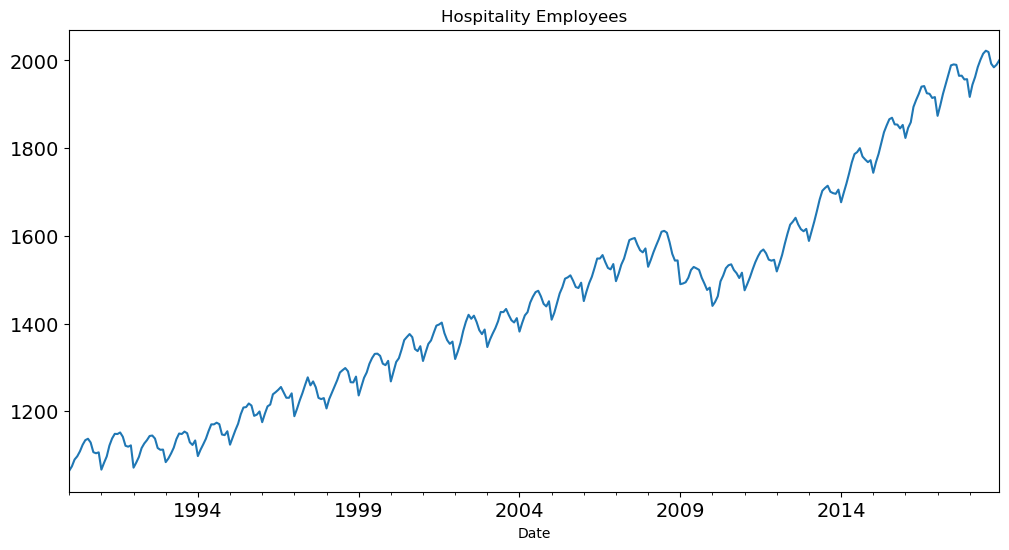

In [6]:
df['Employees'].plot(figsize=(12, 6), title='Hospitality Employees', fontsize=14);

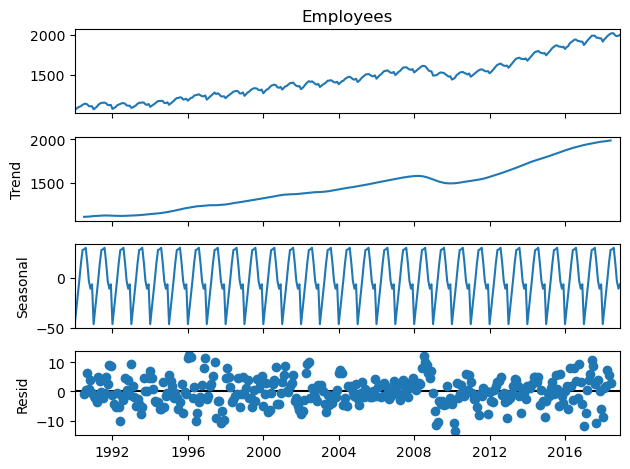

In [8]:
result = seasonal_decompose(df['Employees'], model='add')
result.plot();

In [9]:
auto_arima(df['Employees'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Fri, 18 Apr 2025   AIC                           2208.504
Time:                                      12:33:31   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9242      0.045     20.606      0.000       0.836       1.012
ma.L1         -0.9436      0.070    -13.394      0.000      -1.082      -0.806
ma.L2          0.1289      0.060      2.160      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    704.020      0.000       0.994       1.000
ma.S.L12      -0.7488      0.043    -17.299      0.000      -0.834      -0.664
sigma2        29.3017      1.717     17.065      0.000      25.936      32.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [11]:
model = SARIMAX(train['Employees'], order=(0, 1, 0), seasonal_order=(2, 0, 0, 12))
results = model.fit()   

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Fri, 18 Apr 2025   AIC                           2196.814
Time:                                    12:39:41   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
start = len(train)
end = len(train) + len(test) - 1

In [14]:
predictions = results.predict(start=start, end=end, type='levels').rename('SARIMAX Test Predictions')

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


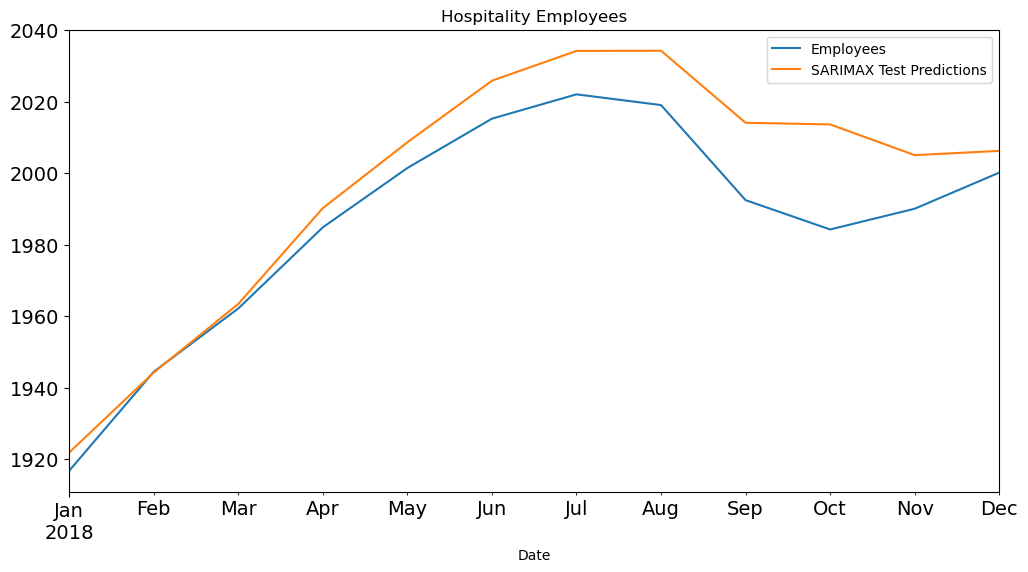

In [15]:
test['Employees'].plot(legend=True, figsize=(12, 6), title='Hospitality Employees', fontsize=14)
predictions.plot(legend=True, fontsize=14);

In [19]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))  
            
rmse(test['Employees'], predictions)

13.522228334857664

In [20]:
13.5222**2

182.84989284

In [22]:
model = SARIMAX(train['Employees'], order=(0, 1, 0), seasonal_order=(2, 0, 0, 12))
results = model.fit() 
fcast = results.predict(start=len(df), end=len(df)+11)


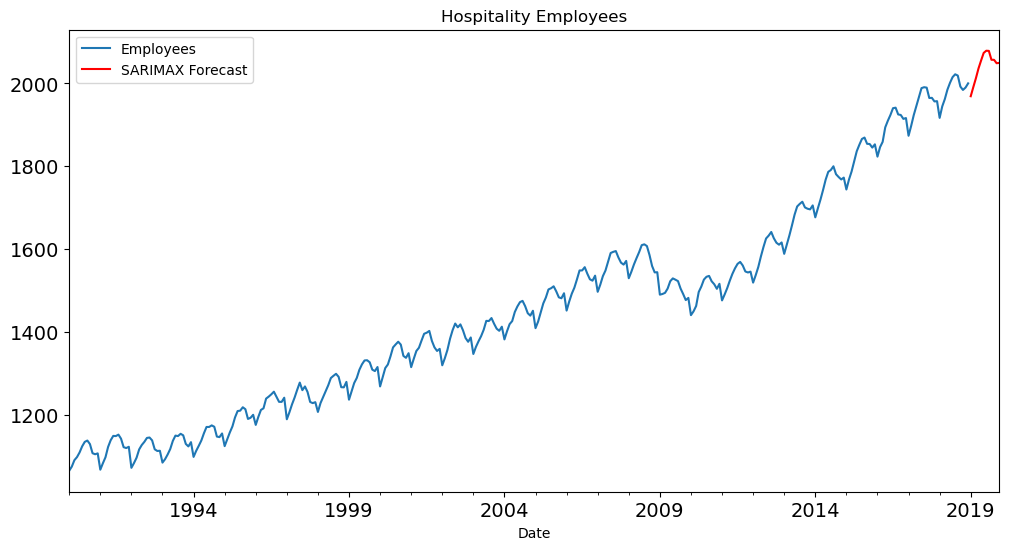

In [23]:
df['Employees'].plot(legend=True, figsize=(12, 6), title='Hospitality Employees', fontsize=14)
fcast.plot(legend=True, fontsize=14, label='SARIMAX Forecast', color='red');